In [1]:
import pandas as pd

In [2]:
# Load df from CSV
df = pd.read_csv("/home/morteza/.nitropulse/outputs/pheno_df.csv", parse_dates=['date'])

print(df.shape)
df.head()

(10354, 30)


,index,date,op,VH,VV,angle,lc,Station,station,depth,...,Clay,Classification,year,doy,BASE_TEMP,cum_GDD_air,cum_GDD_soil,cum_GDD,BBCH,cum_SSM
0,0,2015-03-13 00:31:30,0,-21.0,-11.0,45.0,146,MB18,NaN,NaN,...,NaN,NaN,2015,72,5.0,NaN,NaN,NaN,NaN,NaN
1,0,2015-03-13 00:31:30,0,-20.0,-10.0,45.0,146,MB19,NaN,NaN,...,NaN,NaN,2015,72,5.0,NaN,NaN,NaN,NaN,NaN
2,0,2015-03-13 00:31:30,0,-24.0,-19.0,45.0,146,MB17,NaN,NaN,...,NaN,NaN,2015,72,5.0,NaN,NaN,NaN,NaN,NaN
3,0,2015-03-13 00:31:30,0,-20.0,-13.0,45.0,34,MB16,NaN,NaN,...,NaN,NaN,2015,72,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2015-03-13 00:31:55,0,-19.0,-10.0,41.0,146,MB26,NaN,NaN,...,NaN,NaN,2015,72,5.0,NaN,NaN,NaN,NaN,NaN


In [4]:
from nitropulse import Inverse

# Set the bacscattering models
RT_models = {
    'RT_s': 'PRISM1', # options: 'AIEM', 'PRISM1'
    'RT_c': 'Diff' # options: 'Diffuse', 'Specular'
}

inv = Inverse(workspace_dir='/home/morteza/.nitropulse', fGHz=5.405, models=RT_models, acftype='exp')
inv_df = inv.run(df)

/home/morteza/usask/nitropulse/src/nitropulse/inverse.py:60: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(power)
/home/morteza/usask/nitropulse/src/nitropulse/inverse.py:60: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(power)
/home/morteza/usask/nitropulse/src/nitropulse/inverse.py:60: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(power)
/home/morteza/usask/nitropulse/src/nitropulse/inverse.py:60: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(power)
/home/morteza/usask/nitropulse/.venv/lib/python3.11/site-packages/ssrt/core.py:58: RuntimeWarning: invalid value encountered in divide
  self.eps_ratio = eps3 / eps2
/home/morteza/usask/nitropulse/.venv/lib/python3.11/site-packages/ssrt/utils/fresnel.py:16: RuntimeWarning: invalid value encountered in divide
  gamma0 = np.abs((1 - sqrt_eps) / (1 + sqrt_eps)) ** 2
/home/morteza/usask/nitropulse/.venv/lib/python3.11/site-packages/ssrt/uti

In [5]:
print(inv_df.shape)
inv_df.head()

(6136, 41)


,index,date,op,VH,VV,angle,lc,Station,station,depth,...,c,w,vvv,vvs,s,l,rvi,height,k,b
15,0,2015-03-28 00:56:57,0,-15.0,-11.0,41.0,110,SK4,SK4,0 to 5 cm,...,0.368212,0.038770,-13.980160,-14.040650,0.004097,0.07500,1.138989,0.009112,0.8,0.0
16,0,2015-03-28 00:56:57,0,-17.0,-11.0,41.0,122,SK2,SK2,0 to 5 cm,...,0.357600,0.043593,-13.991621,-14.029060,0.003615,0.07500,0.803040,0.008030,1.0,0.0
17,0,2015-03-28 00:56:57,0,-18.0,-11.0,41.0,122,SK1,SK1,0 to 5 cm,...,0.344843,0.048894,-13.987777,-14.032940,0.003073,0.03081,0.665350,0.006654,1.0,0.0
47,0,2015-04-25 00:23:20,0,-22.0,-12.0,40.0,147,MB9,MB9,0 to 5 cm,...,0.368089,0.038887,-14.981109,-15.039688,0.003558,0.07500,0.363636,0.009091,2.5,0.0
48,0,2015-04-25 00:23:20,0,-19.0,-14.0,40.0,153,MB6,MB6,0 to 5 cm,...,0.396241,0.030876,-16.949110,-17.072364,0.002609,0.07500,0.961012,0.011532,1.2,0.0


In [ ]:
inv_df.to_csv("/home/morteza/.nitropulse/outputs/inv_df.csv", index=False)

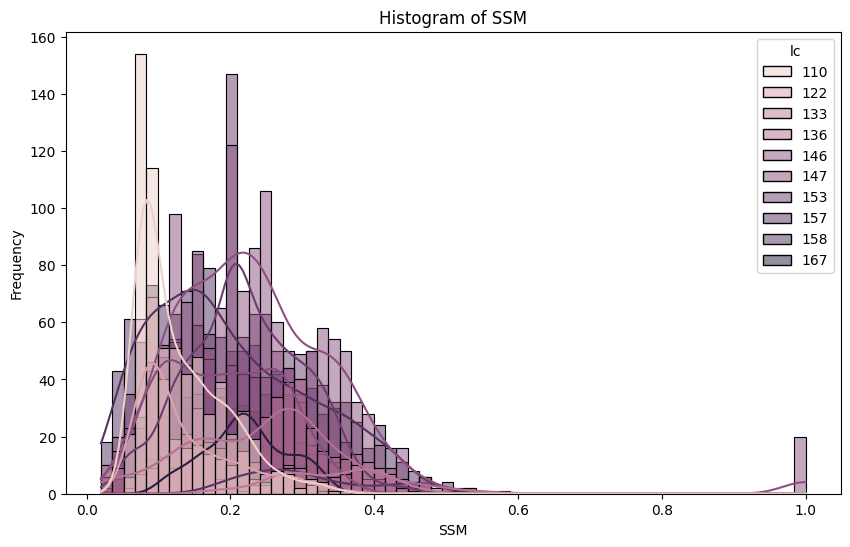

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'gp_merged' DataFrame is already created as in the provided code.

plt.figure(figsize=(10, 6))
sns.histplot(inv_df, x='SSM', kde=True, hue='lc')
plt.title('Histogram of SSM')
plt.xlabel('SSM')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_18129/369816459.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))


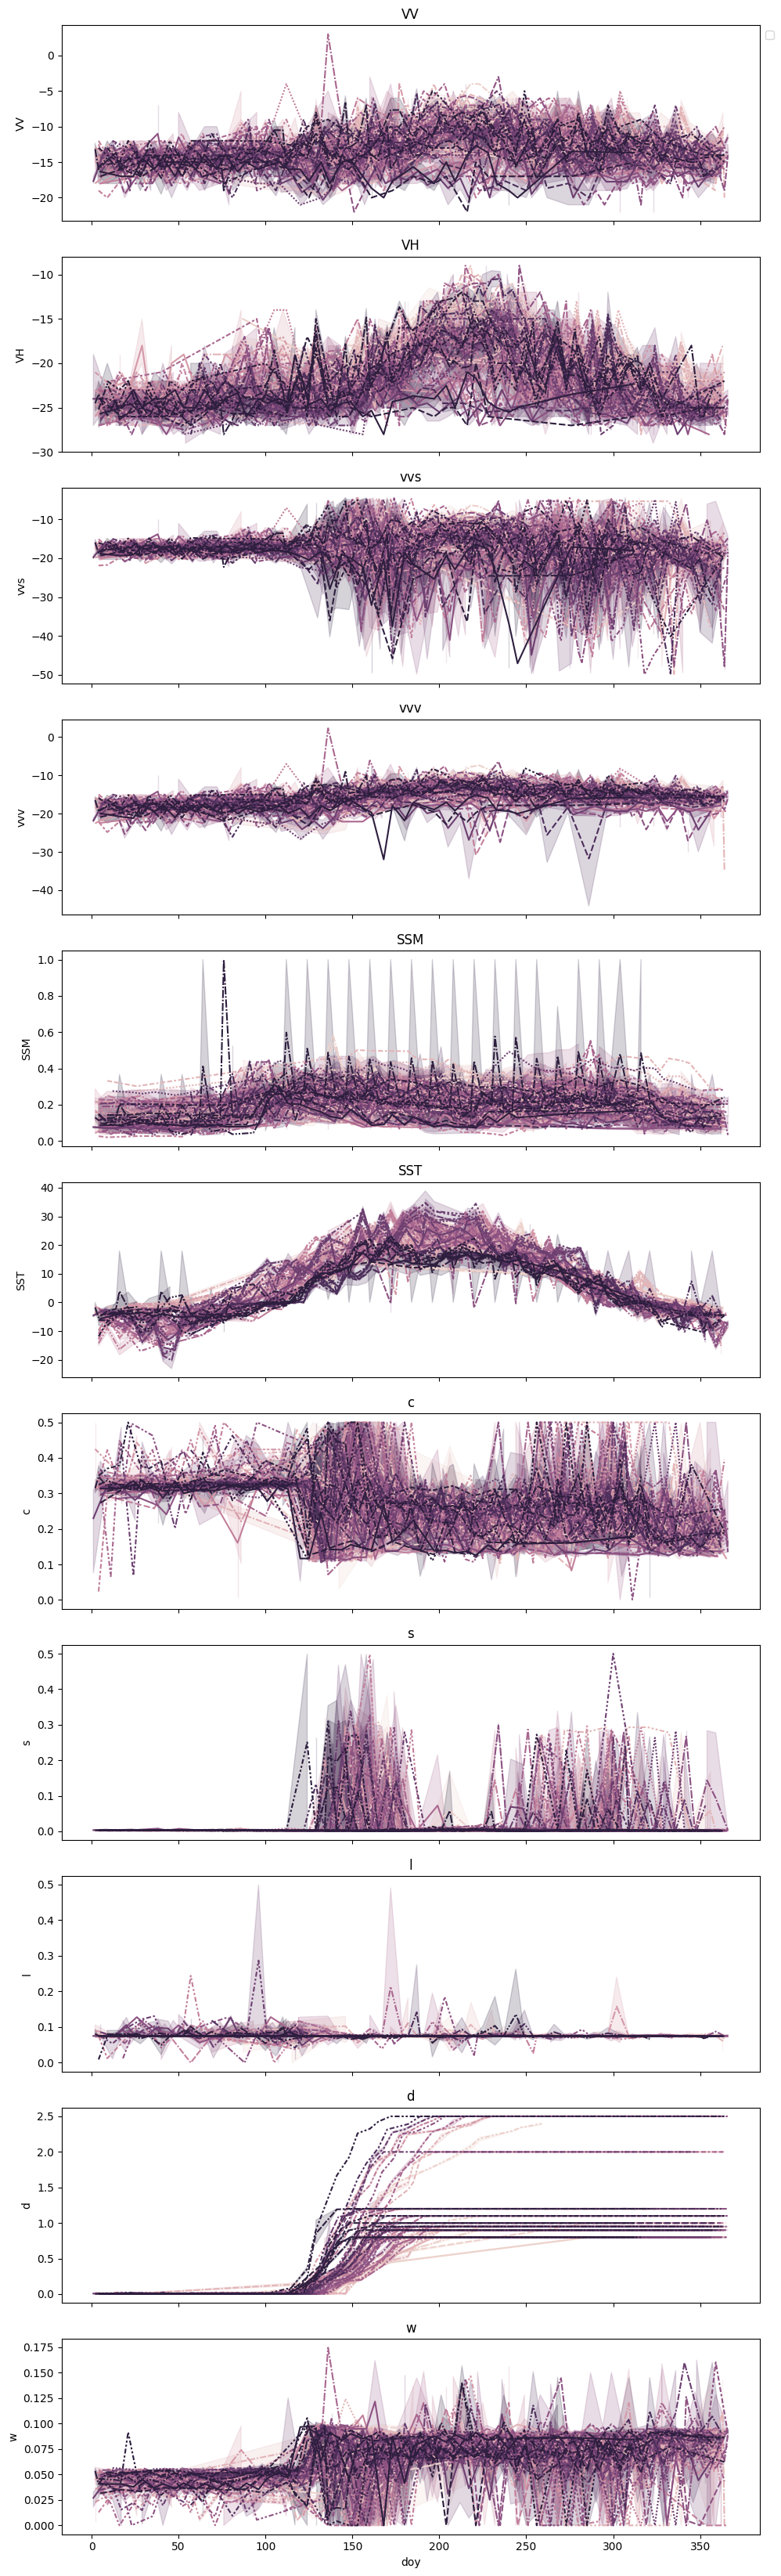

In [7]:
# Assuming 'gp_merged' DataFrame is already created as in the provided code.

parameters = ['VV', 'VH', 'vvs', 'vvv', 'SSM', 'SST', 'c', 's', 'l', 'd', 'w']
num_parameters = len(parameters)

fig, axes = plt.subplots(num_parameters, 1, figsize=(10, 3 * num_parameters), sharex=True)

for i, param in enumerate(parameters):
    sns.lineplot(ax=axes[i], x='doy', y=param, data=inv_df, hue='year', style='lc', legend=False)
    axes[i].set_title(param)
    # Add legend only to the first subplot
    if i == 0:
        axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()